In [1]:
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf

In [2]:
import keras
from keras import layers

IMG_SIZE = 224
BATCH_SIZE = 64

def build_model():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights='imagenet')

    model.trainable = False
    outputs = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)

    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [3]:
model = build_model()
model.summary()



Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [4]:
def load_and_prep_image(filename, img_shape=224, scale=True):

    # Read in the image
    img = tf.io.read_file(filename)
    # Decode it into a tensor
    img = tf.io.decode_image(img)
    # Resize the image
    img = img[:, :, :3] #remove alpha from a jpg?
    
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    if scale:
        # Rescale the image (get all values between 0 and 1)
        return img/255.
    else:
        return img

In [11]:
# Make preds on a series of random images
import os
import random
import matplotlib.pyplot as plt
import numpy as np

black_img = np.zeros(shape=(224, 224, 3))
outputs = []
images = []
filenames = []
pic_dir = "plushie/"

images_files = os.listdir(pic_dir)
len_images_files = len(images_files)

for i in range(len_images_files):
    filename = images_files[i]
    filepath = pic_dir + filename


    try:
        # Load the image and make predictions
        img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions

    except:
        continue;

    #print(tf.expand_dims(img, axis=0))
    model_output = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
    outputs.append(model_output.squeeze())
    images.append(img)
    filenames.append(filepath)

1/1 [==============================] - 0s 38ms/step


In [12]:
print(outputs)

[array([ 0.5992566 , -0.13790368,  0.01970669, ...,  0.05648563,
        0.07788952, -0.13098812], dtype=float32), array([-0.12790112, -0.06530427, -0.06450189, ...,  0.4592814 ,
        0.07390346,  0.5686294 ], dtype=float32), array([ 0.5699313 , -0.08637539, -0.10334679, ...,  0.42242804,
        0.2850945 ,  0.6685569 ], dtype=float32), array([-0.1749038 ,  0.08406843, -0.14394495, ...,  0.00303129,
       -0.07387497,  0.01397034], dtype=float32), array([ 0.28191102, -0.11743139, -0.07763757, ...,  1.0591204 ,
        1.1061687 ,  2.0979128 ], dtype=float32), array([-0.20436041, -0.19569854, -0.11257569, ..., -0.14022142,
        0.03917668,  0.19633514], dtype=float32), array([-0.15043323, -0.03419622, -0.08853505, ..., -0.15741737,
        0.0276097 ,  0.11618704], dtype=float32), array([-0.14271037,  0.24365294, -0.1557417 , ..., -0.16249353,
        0.01335597, -0.15654035], dtype=float32), array([-0.00931248, -0.15940677,  0.05723411, ...,  0.28772822,
        0.18019322,  0.

In [13]:
print(filenames)

['plushie/plushies_1.jpg', 'plushie/plushies_10.jpg', 'plushie/plushies_100.jpg', 'plushie/plushies_11.jpg', 'plushie/plushies_12.jpg', 'plushie/plushies_13.jpg', 'plushie/plushies_14.jpg', 'plushie/plushies_15.jpg', 'plushie/plushies_16.jpg', 'plushie/plushies_17.jpg', 'plushie/plushies_18.jpg', 'plushie/plushies_19.jpg', 'plushie/plushies_2.jpg', 'plushie/plushies_20.jpg', 'plushie/plushies_21.jpg', 'plushie/plushies_23.jpg', 'plushie/plushies_24.jpg', 'plushie/plushies_25.jpg', 'plushie/plushies_26.jpg', 'plushie/plushies_27.jpg', 'plushie/plushies_28.jpg', 'plushie/plushies_29.jpg', 'plushie/plushies_3.jpg', 'plushie/plushies_30.jpg', 'plushie/plushies_31.jpg', 'plushie/plushies_32.jpg', 'plushie/plushies_33.jpg', 'plushie/plushies_34.jpg', 'plushie/plushies_35.jpg', 'plushie/plushies_36.jpg', 'plushie/plushies_37.jpg', 'plushie/plushies_38.jpg', 'plushie/plushies_39.jpg', 'plushie/plushies_4.jpg', 'plushie/plushies_40.jpg', 'plushie/plushies_41.jpg', 'plushie/plushies_42.jpg', 'pl

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.01, min_samples=2, metric='euclidean')
y_db = db.fit_predict(outputs)
y_db

array([ 0,  1, -1,  2,  3, -1, -1,  4, -1, -1,  5, -1,  6,  7, -1, -1,  8,
       -1,  9, 10, -1, 11, 12, -1, -1, 13, -1, -1, -1, -1, -1, 14, -1, -1,
       -1, -1, 15, -1, -1, -1, -1, -1, 16, -1, -1, -1, -1, 17, 18, -1, -1,
       -1, -1, 19, 20, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, 21, -1, -1, 22, -1, 23, 24, -1, -1, 25, -1, -1, -1, 26,
       27, -1, -1, -1, 28, -1, -1, -1, -1, -1, -1, 29,  3, 30, -1, 24, 31,
       -1, -1,  2, -1, -1,  4,  1, 32,  5, -1, -1, -1, -1, 26, -1, 33, 34,
       -1, 11, -1, -1, -1, -1, -1,  8, -1, -1, -1, 16, 35, -1, -1, 17, -1,
       21, -1, -1, -1, 36, 37, 13, 20, -1, 10, -1, 38, -1, -1, 39, 40, -1,
       12, -1, -1, -1, 19, -1, -1,  9, -1, -1, -1, -1, -1, -1, 41, 22, -1,
       -1, -1, -1, -1, -1, 27, -1, -1, -1, -1, -1, 25, -1, 23, -1, 14, -1,
       -1, -1, -1, -1, -1, -1, -1,  7,  0, -1, -1, -1, -1,  6,  4, 35, -1,
       29,  5, -1, -1, 30, 38, -1, -1, 32, -1, -1, -1, -1, 34, -1, -1, 18,
       33, -1, 13, 22, -1

In [15]:
clusters = []
clusters_filenames = []
classes = np.unique(y_db)
for i in range (len(classes)):
    cluster = []
    cluster_filenames = []
    for j in range(len(y_db)):
        if y_db[j] == classes[i]:
            cluster.append(images[j])
            cluster_filenames.append(filenames[j])
    print(len(cluster))
    clusters.append(cluster)
    clusters_filenames.append(cluster_filenames)

189
2
2
2
2
3
3
2
2
2
2
3
2
2
3
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


removing file: plushie/plushy_14.jpg


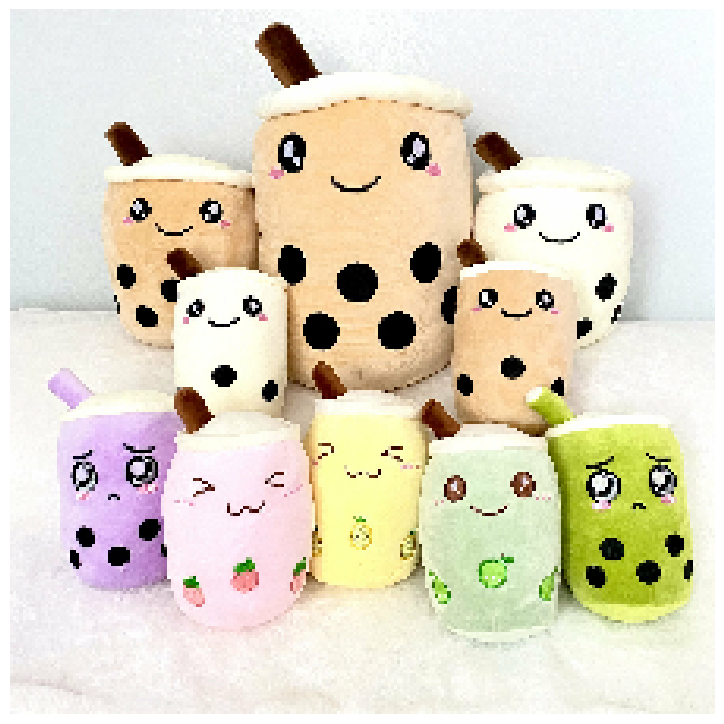

removing file: plushie/plushie_21.jpg


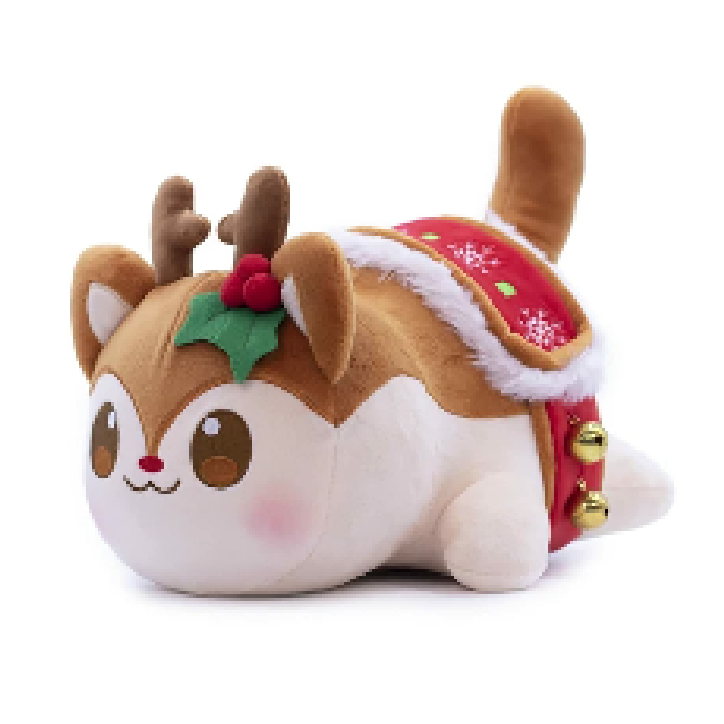

removing file: plushie/plushie_17.jpg


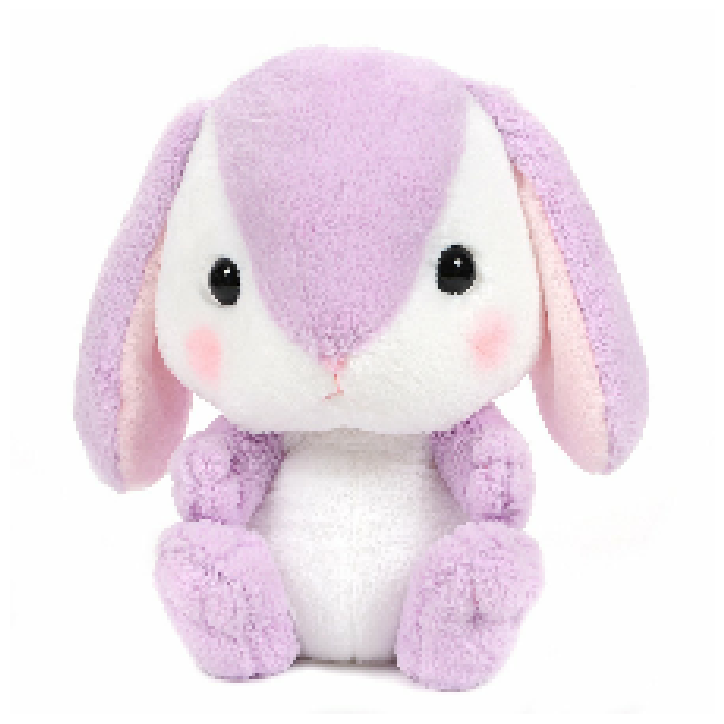

removing file: plushie/plushie_100.jpg


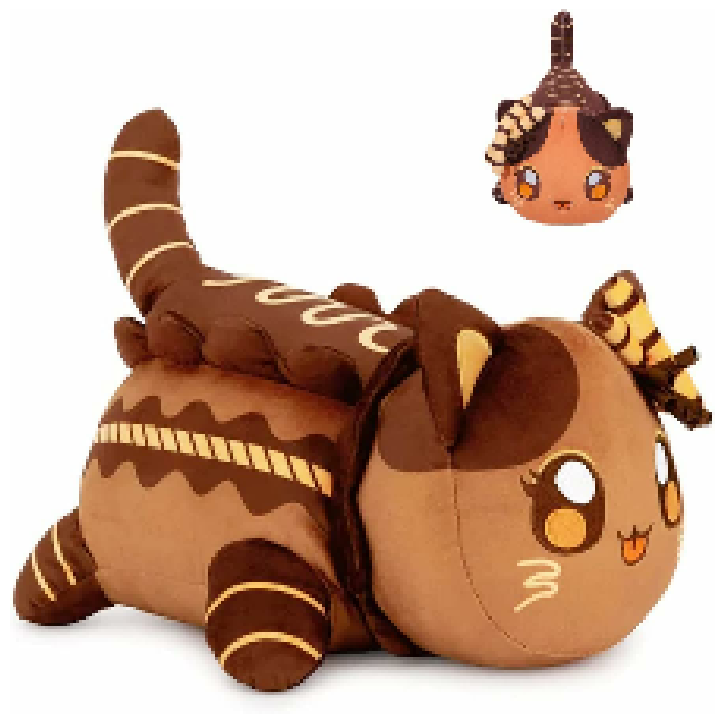

removing file: plushie/plushie_20.jpg
removing file: plushie/plushy_20.jpg


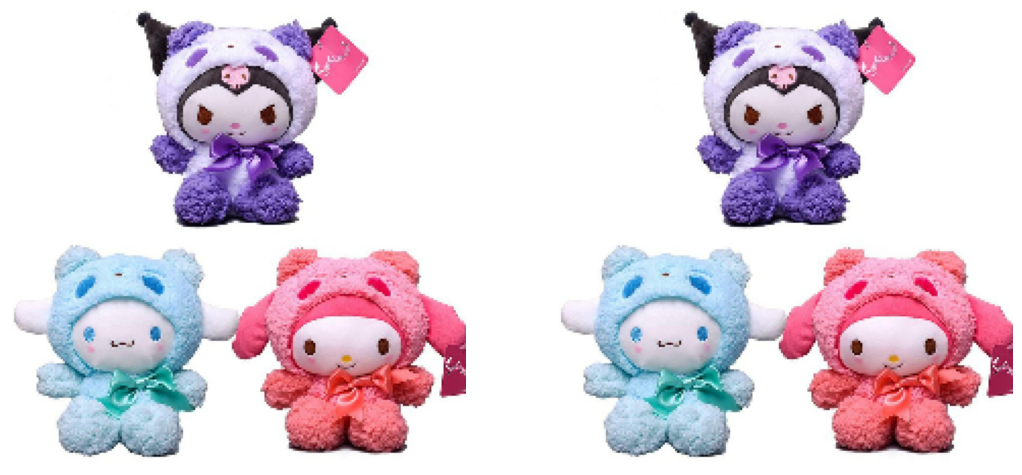

removing file: plushie/plushie_23.jpg
removing file: plushie/plushy_24.jpg


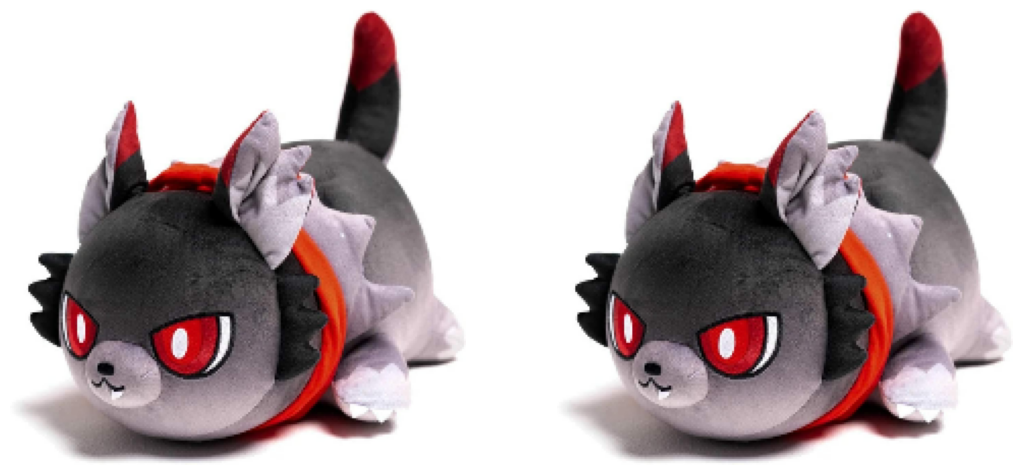

removing file: plushie/plushy_2.jpg


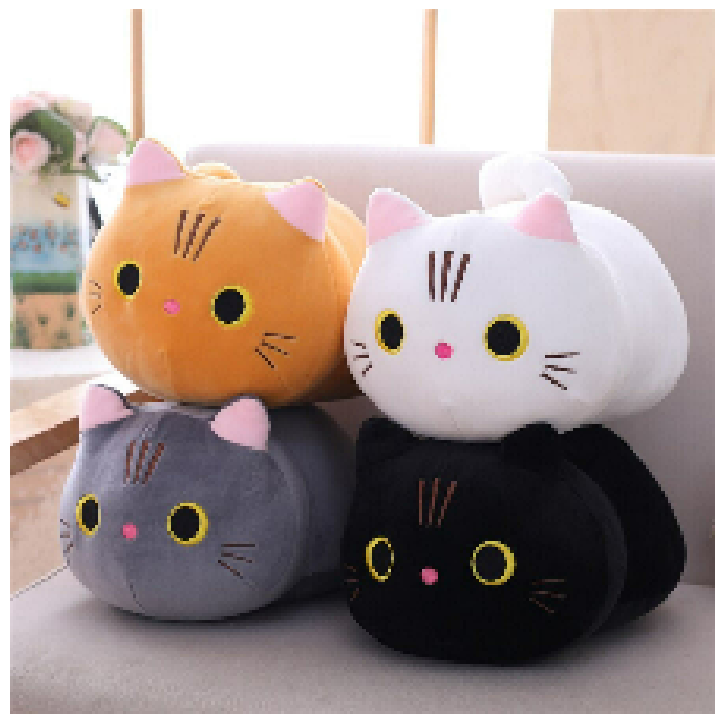

removing file: plushie/plushy_13.jpg


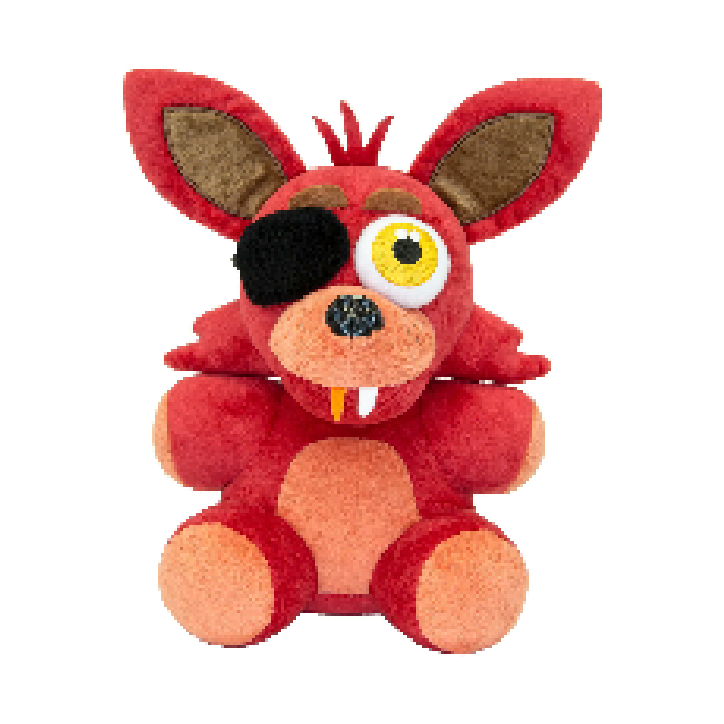

removing file: plushie/plushie_39.jpg


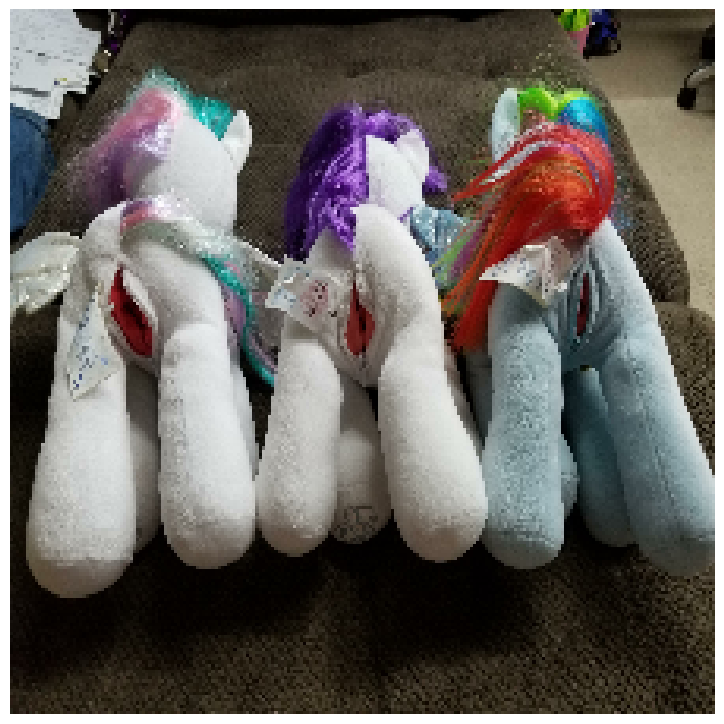

removing file: plushie/plushie_72.jpg


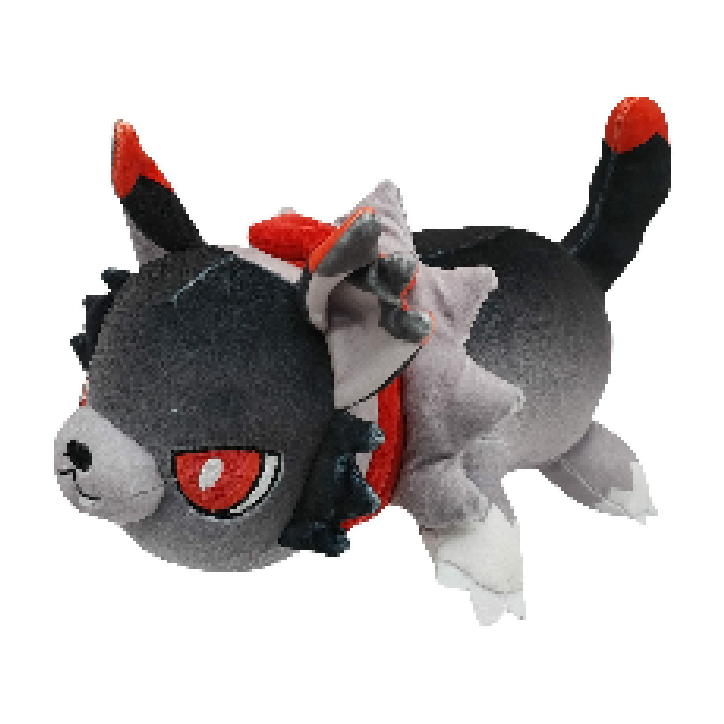

removing file: plushie/plushie_58.jpg
removing file: plushie/plushy_65.jpg


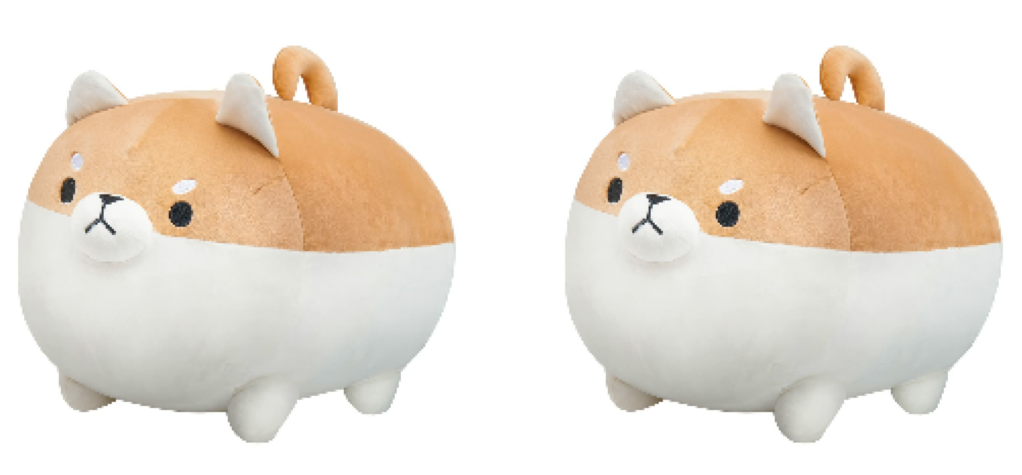

removing file: plushie/plushie_32.jpg


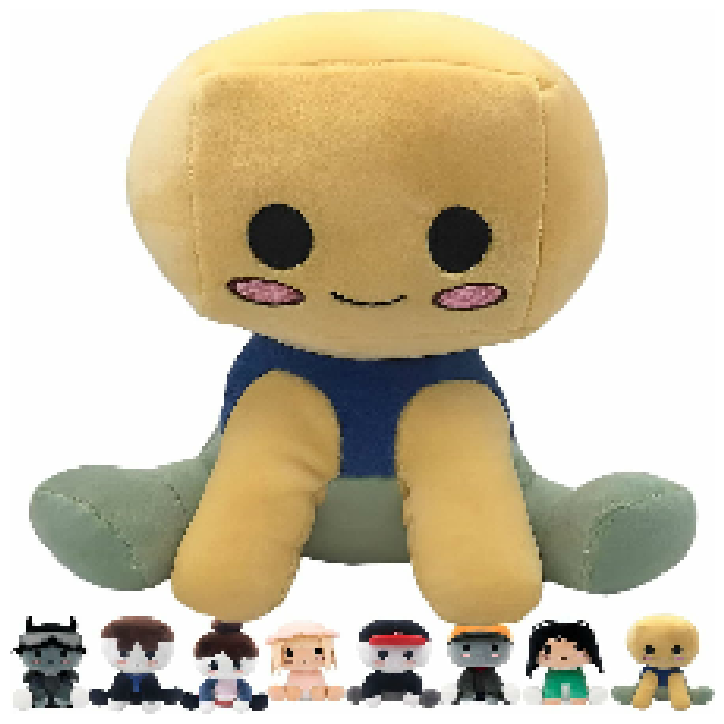

removing file: plushie/plushie_65.jpg


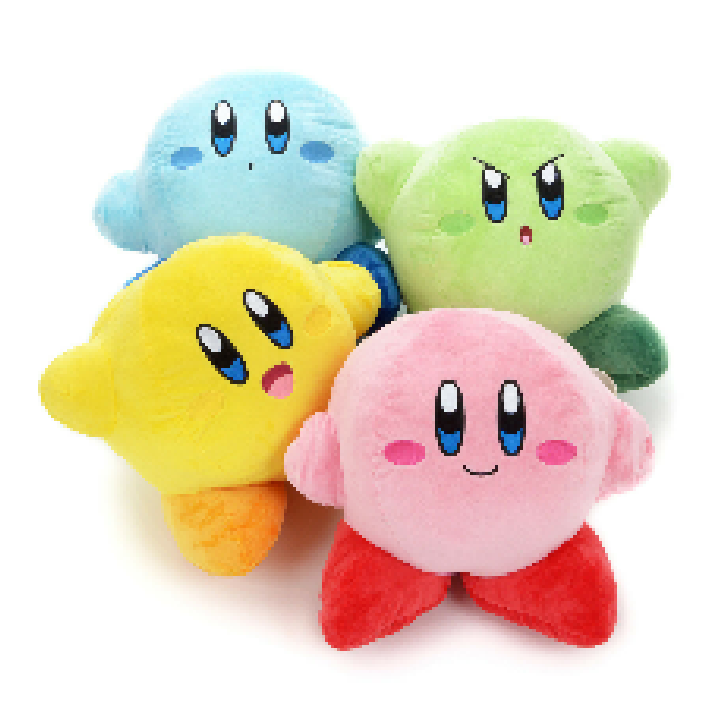

removing file: plushie/plushie_54.jpg
removing file: plushie/plushy_42.jpg


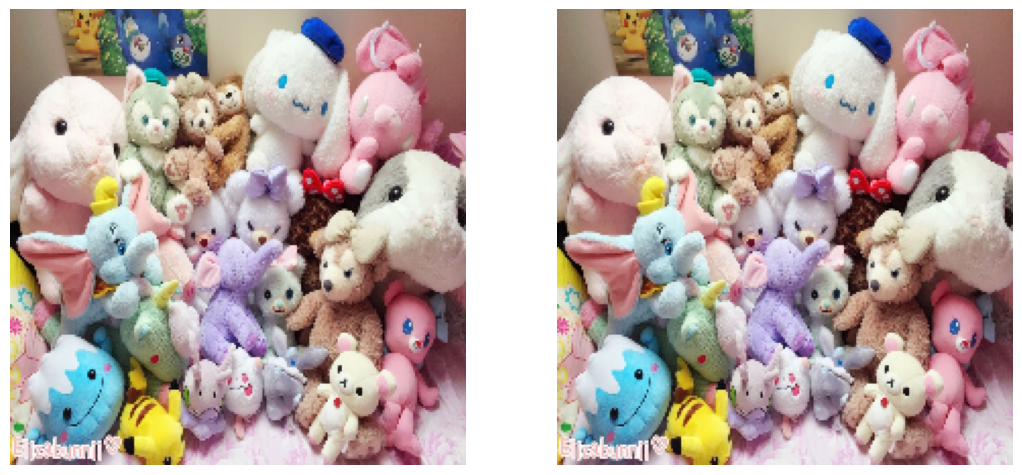

removing file: plushie/plushie_95.jpg


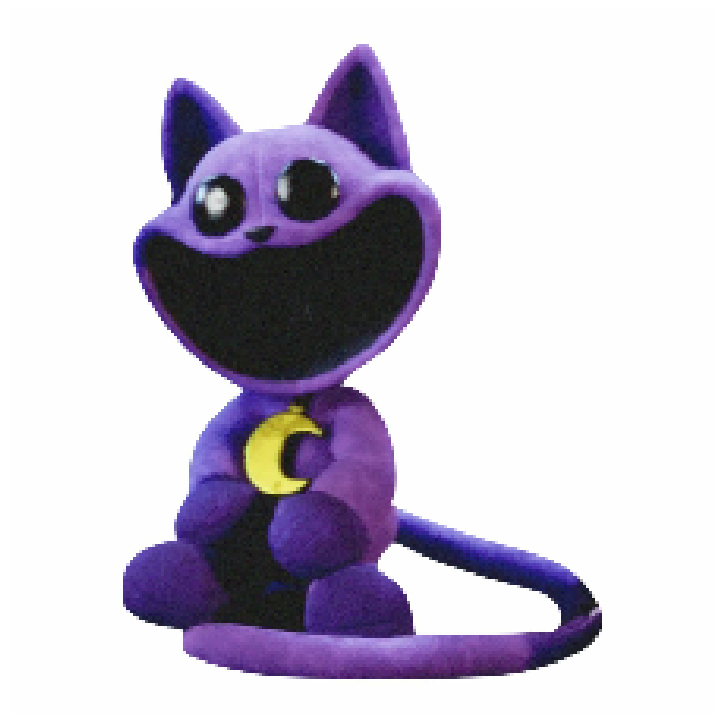

removing file: plushie/plushy_50.jpg


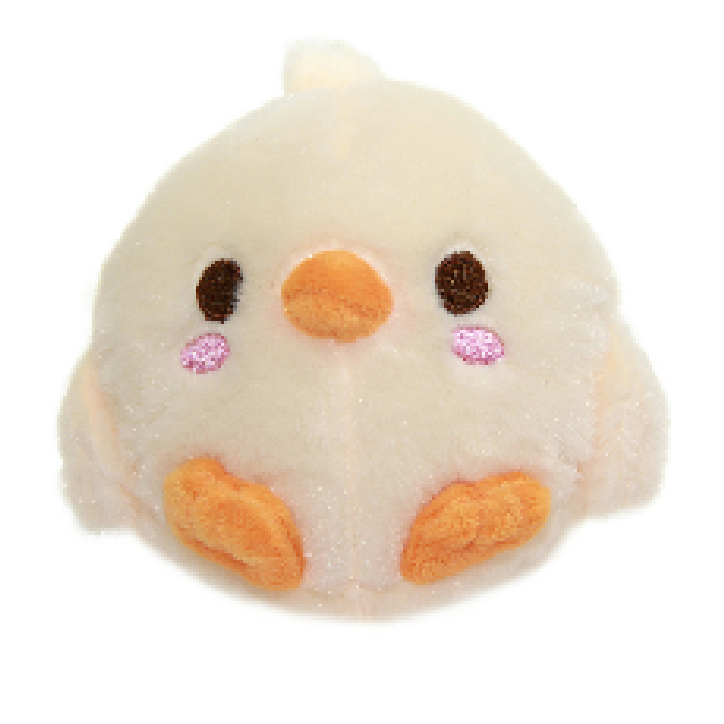

removing file: plushie/plushie_42.jpg


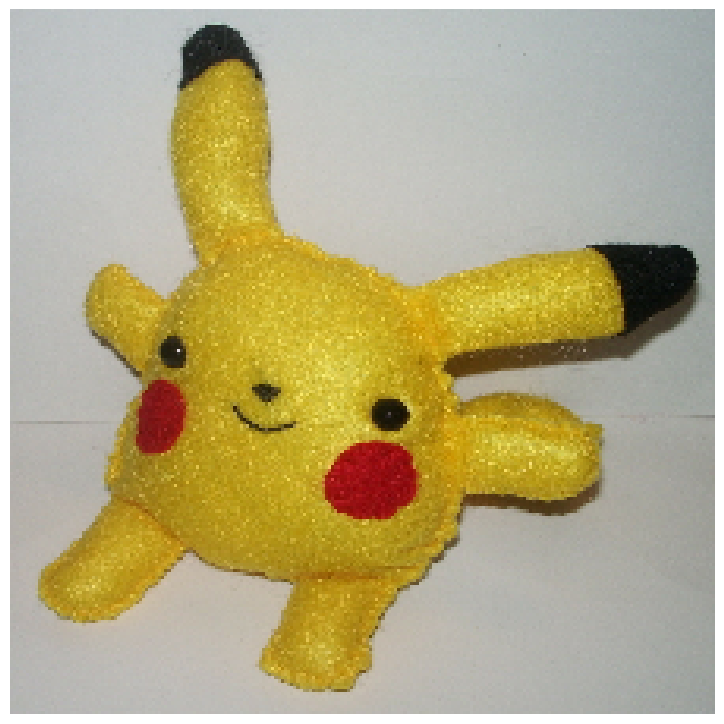

removing file: plushie/plushie_46.jpg
removing file: plushie/plushy_69.jpg


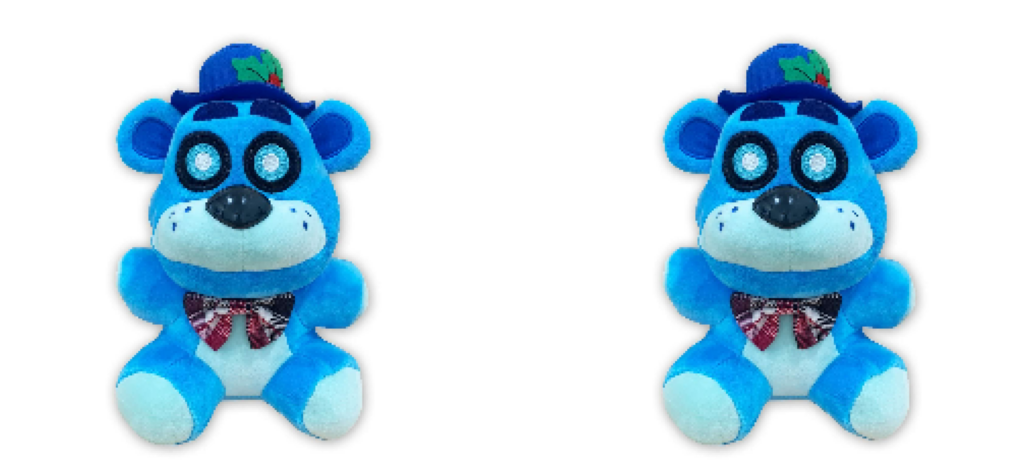

removing file: plushie/plushy_39.jpg


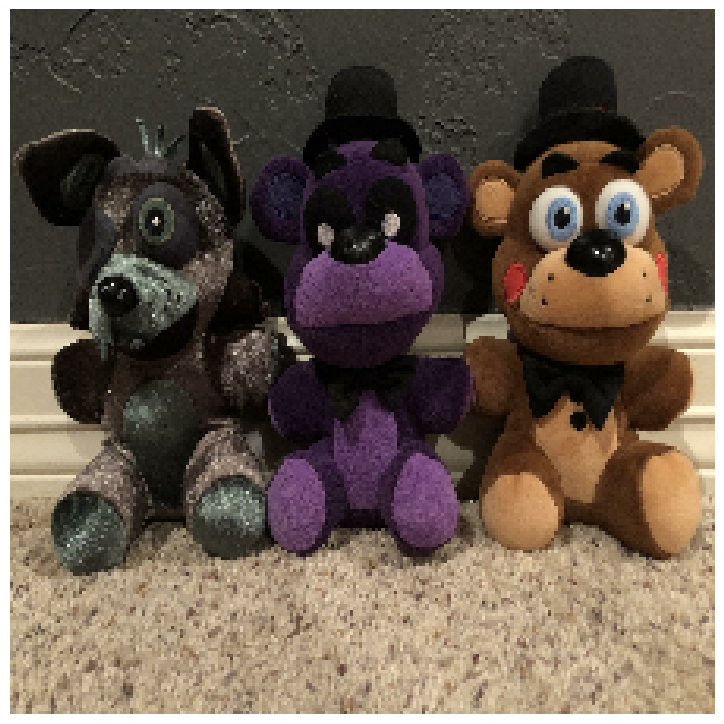

removing file: plushie/plushie_69.jpg


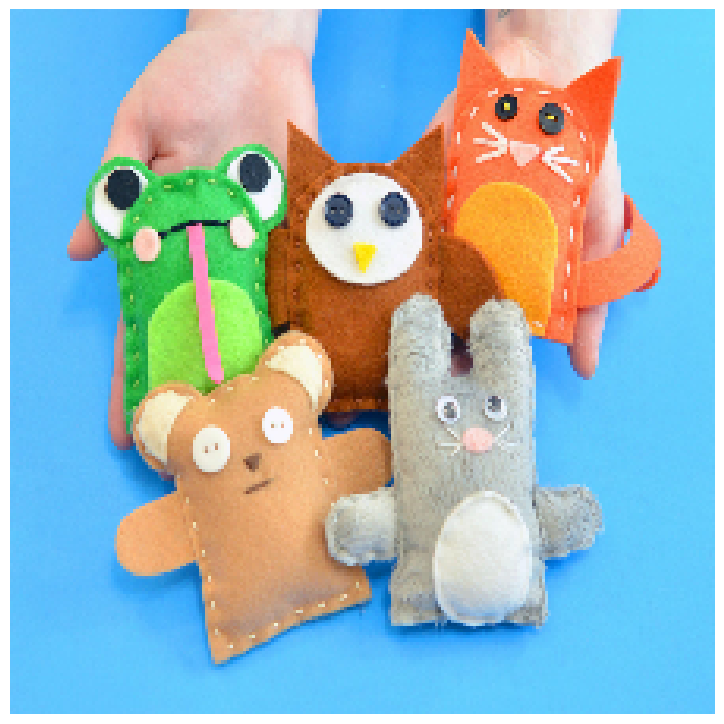

removing file: plushie/plushie_55.jpg


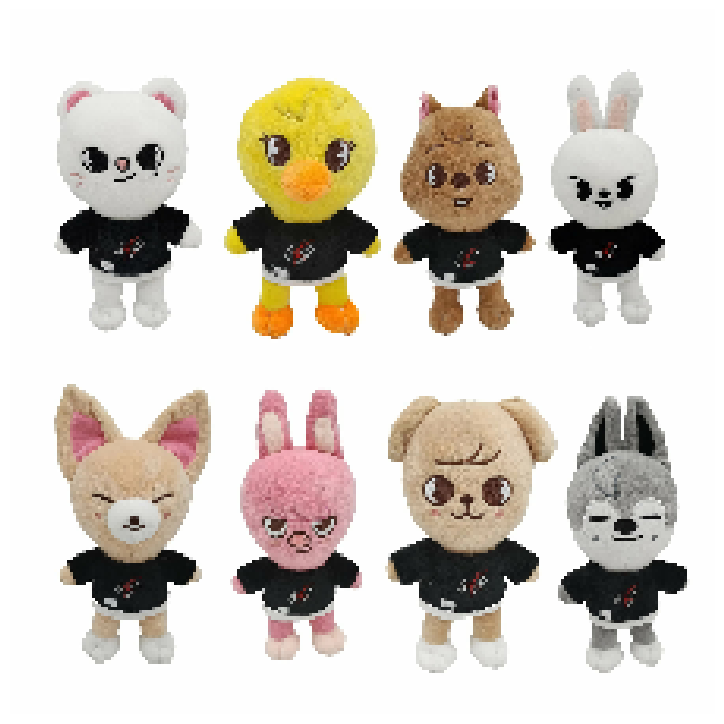

removing file: plushie/plushie_48.jpg


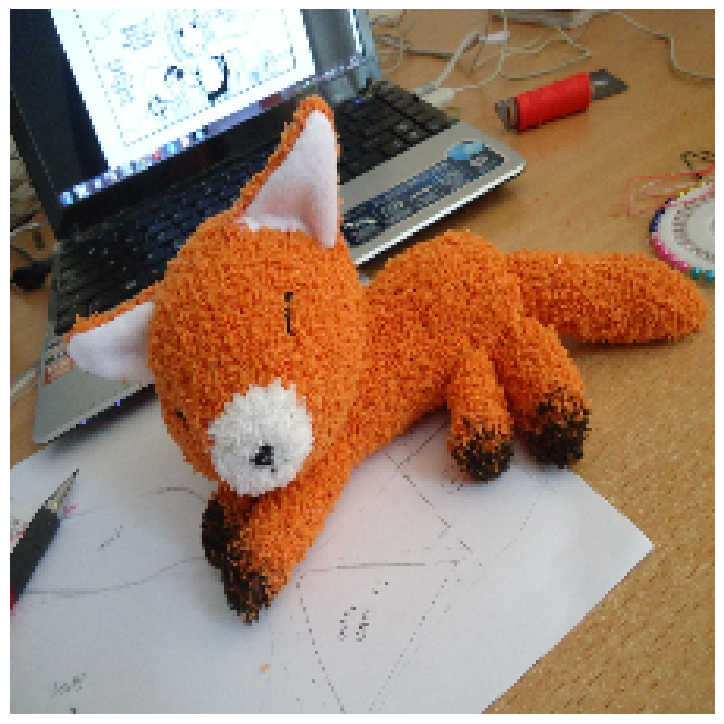

removing file: plushie/plushie_8.jpg
removing file: plushie/plushy_43.jpg


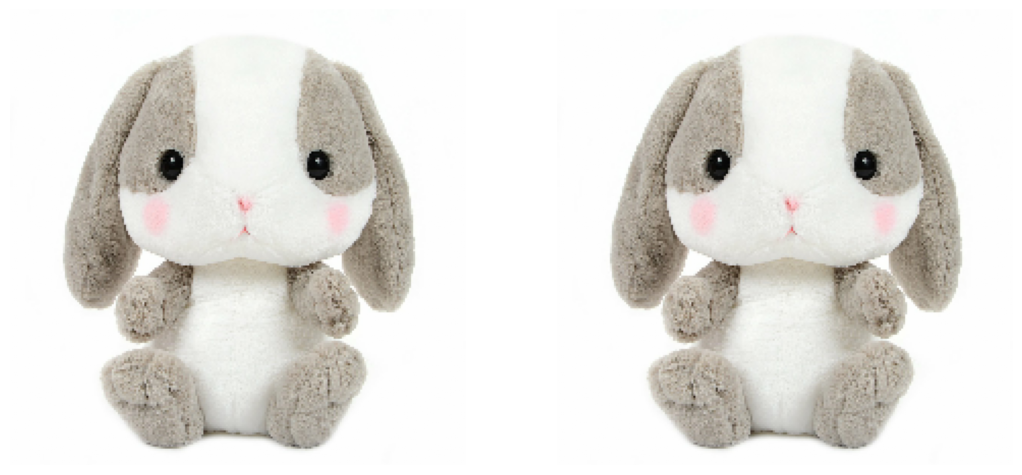

removing file: plushie/plushie_93.jpg


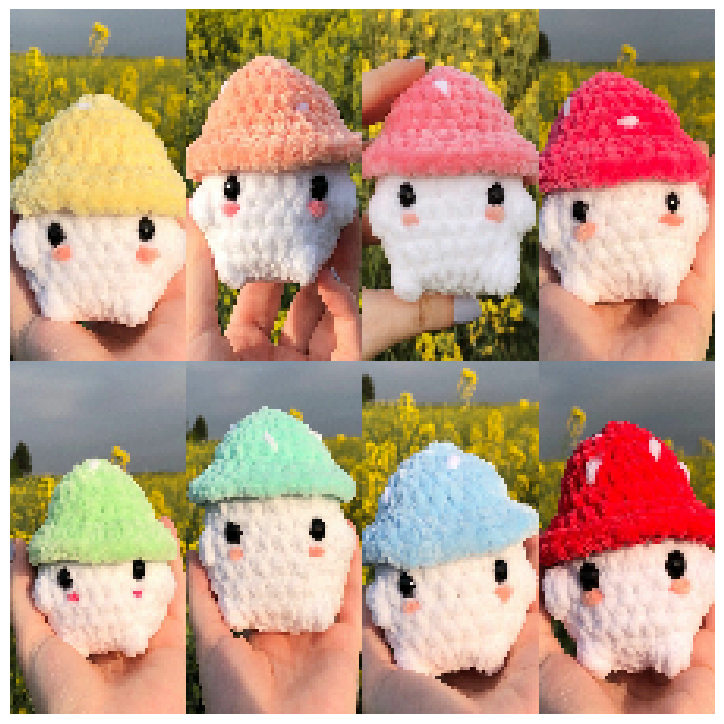

removing file: plushie/plushie_13.jpg


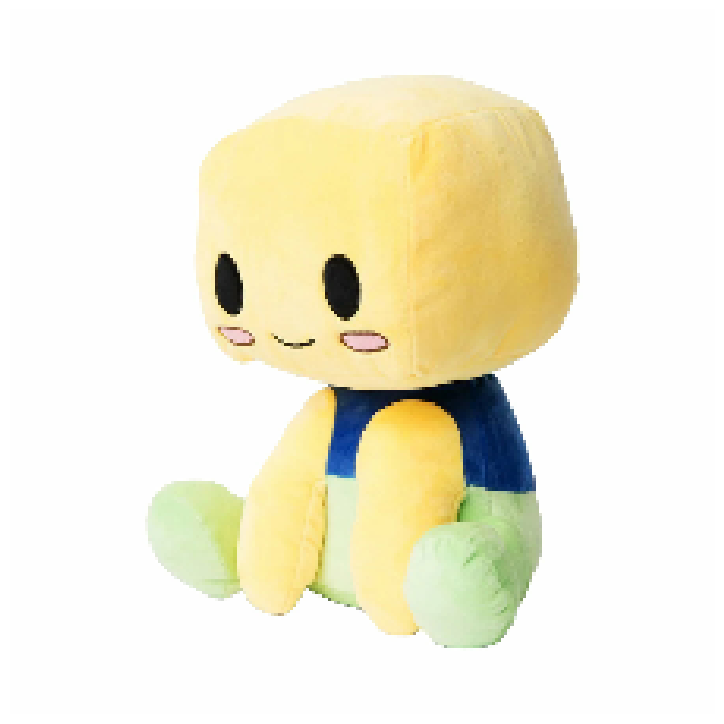

removing file: plushie/plushie_91.jpg


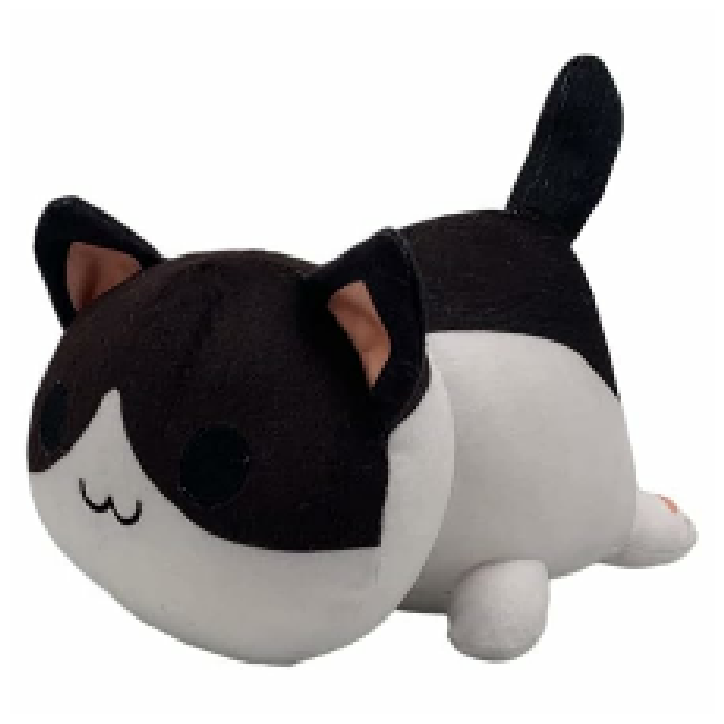

removing file: plushie/plushie_28.jpg


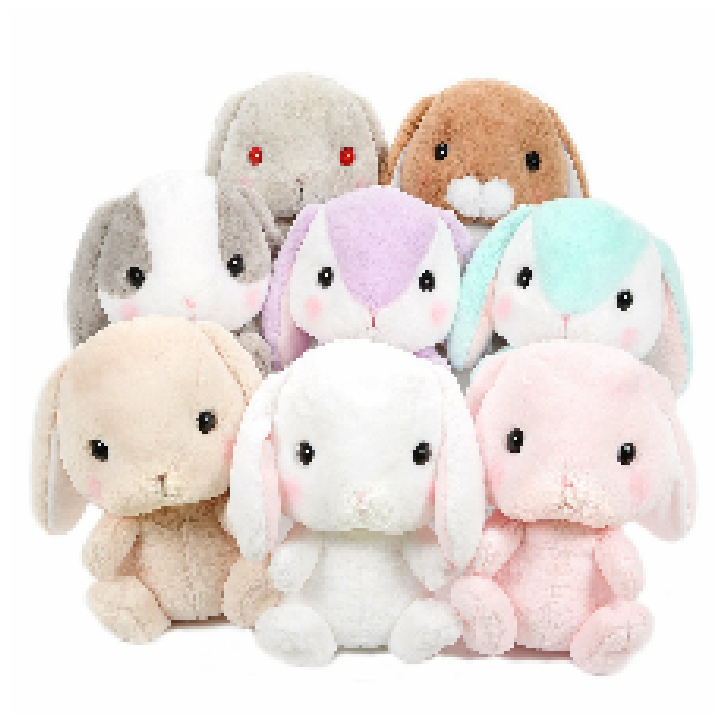

removing file: plushie/plushie_86.jpg


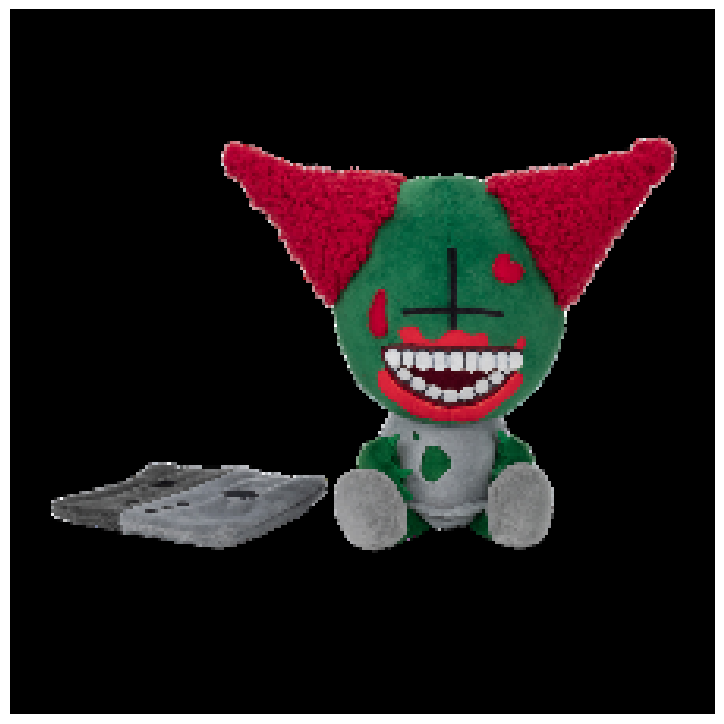

removing file: plushie/plushy_94.jpg


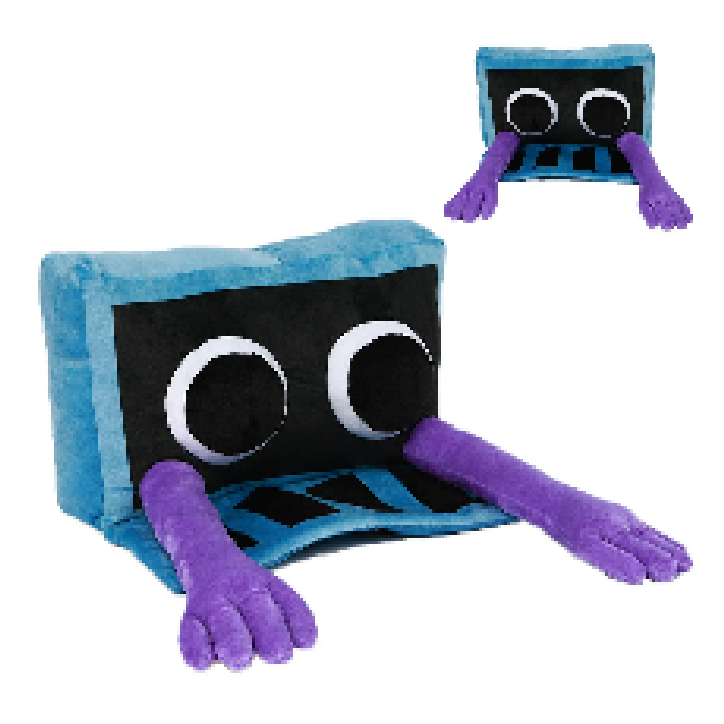

removing file: plushie/plushy_23.jpg


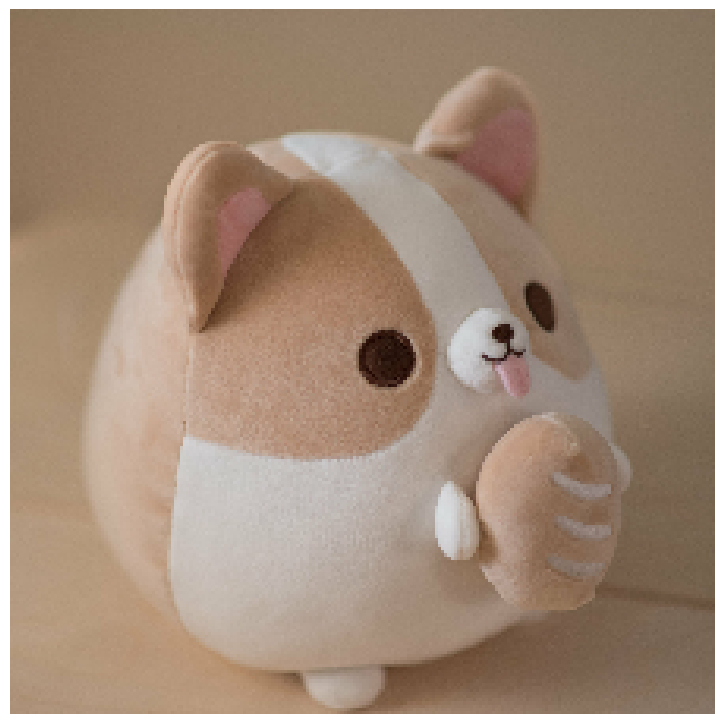

removing file: plushie/plushy_28.jpg


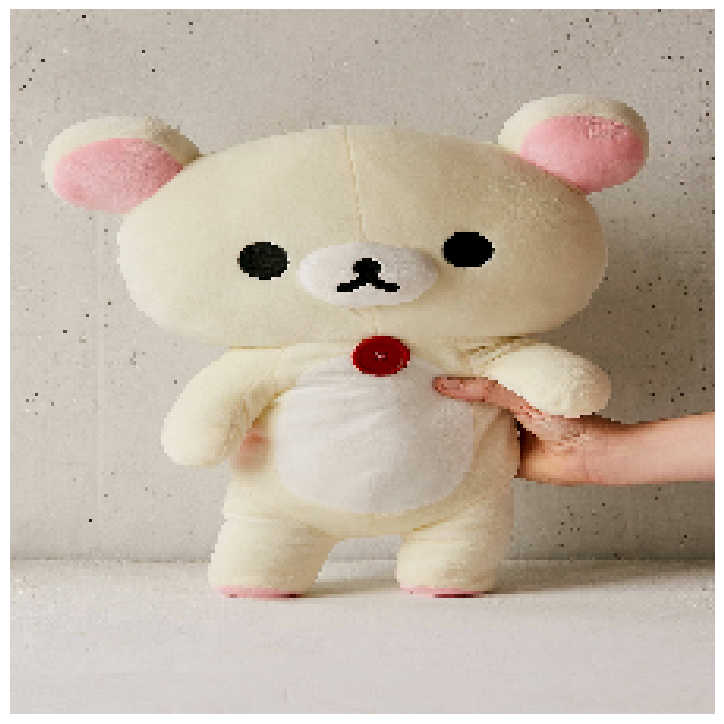

removing file: plushie/plushy_6.jpg


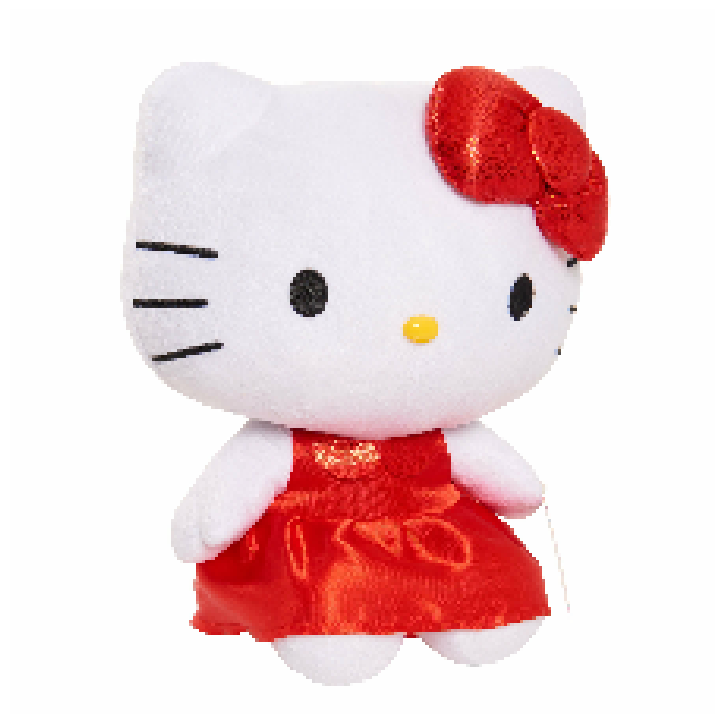

removing file: plushie/plushy_31.jpg


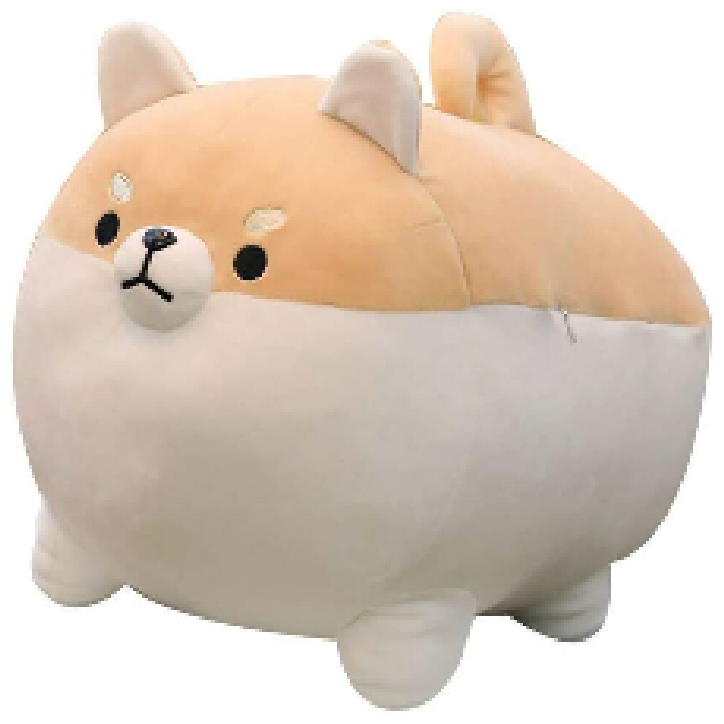

removing file: plushie/plushy_4.jpg


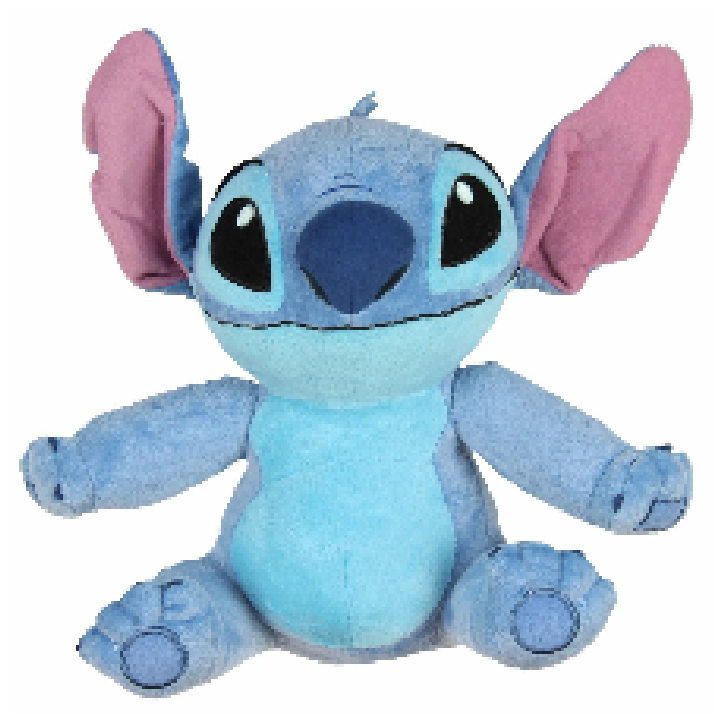

removing file: plushie/plushy_36.jpg


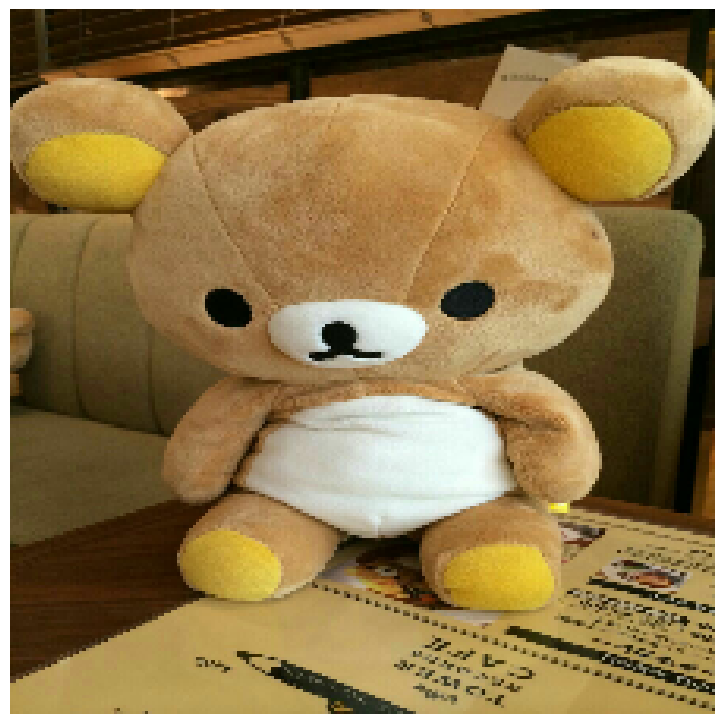

removing file: plushie/plushy_21.jpg


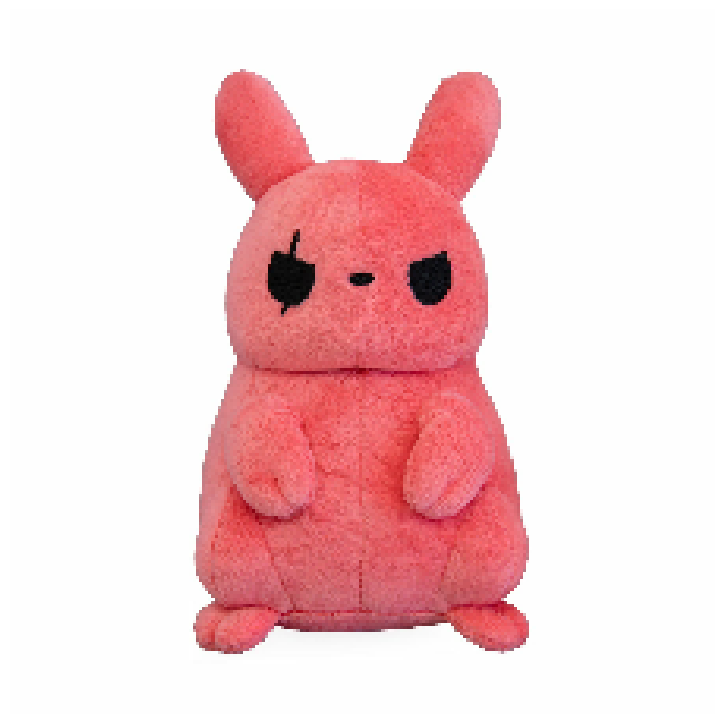

removing file: plushie/plushy_74.jpg


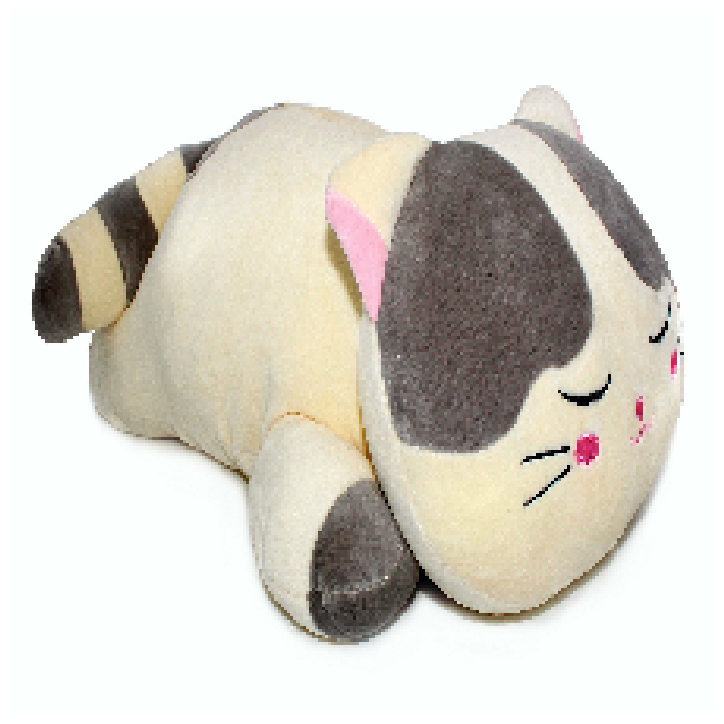

removing file: plushie/plushy_93.jpg


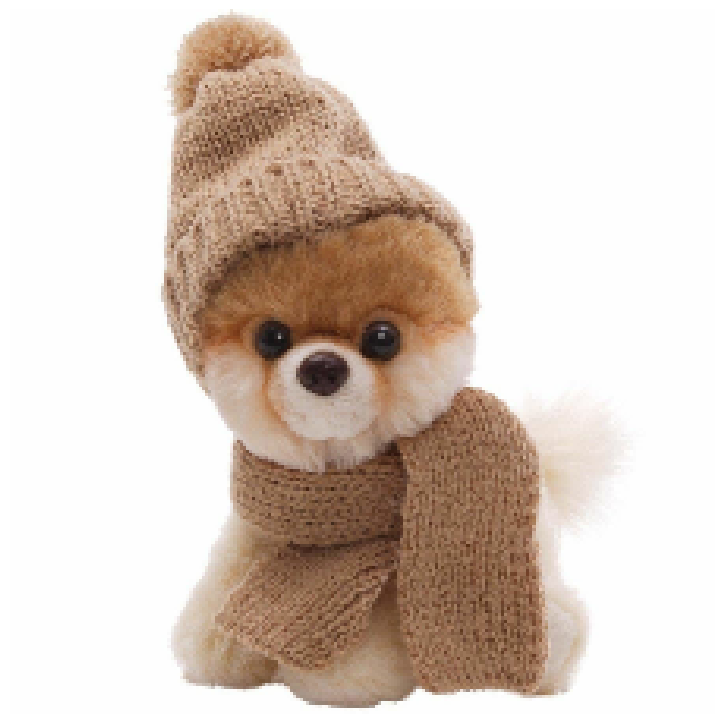

removing file: plushie/plushy_29.jpg


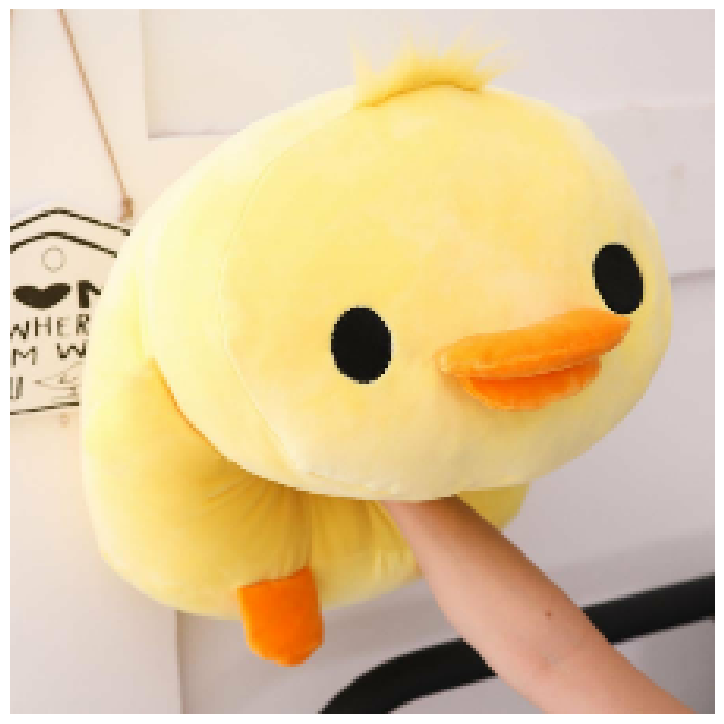

removing file: plushie/plushy_99.jpg


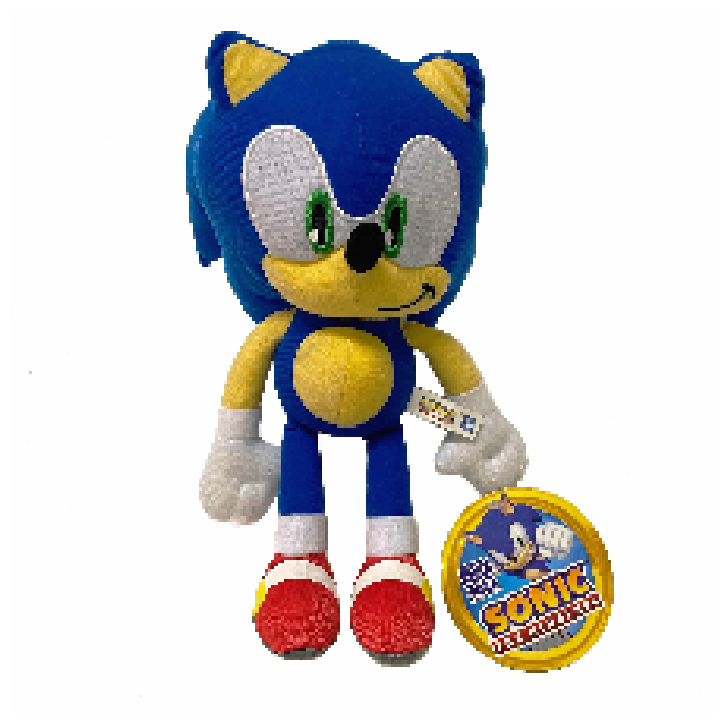

removing file: plushie/plushy_97.jpg


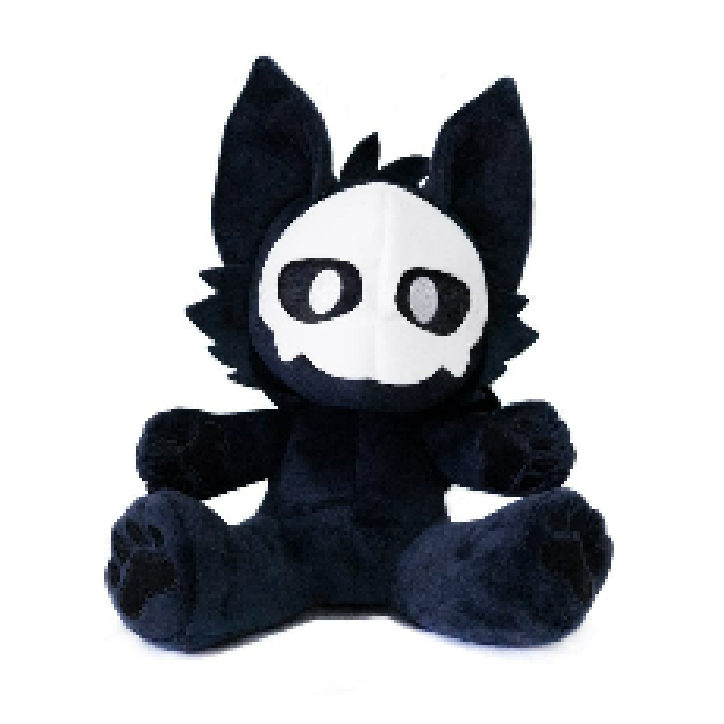

removing file: plushie/plushy_59.jpg


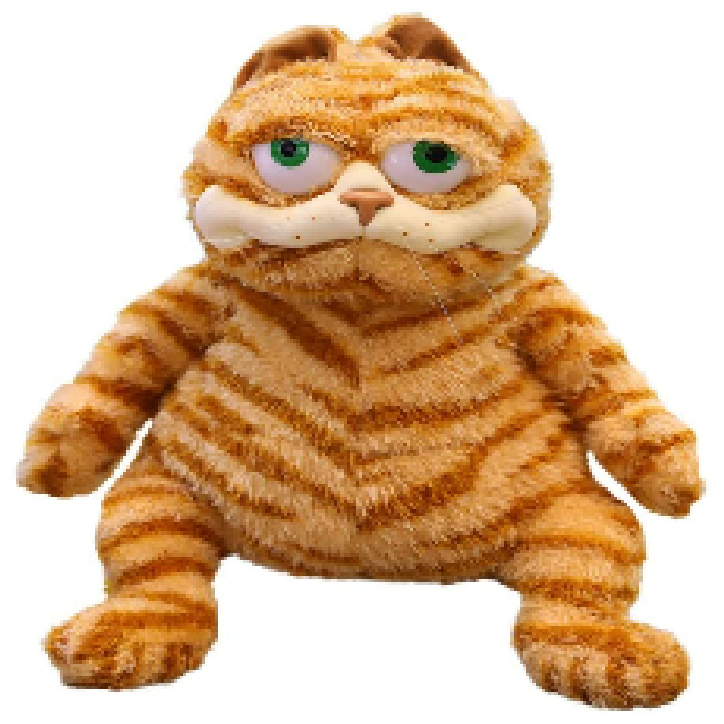

In [16]:
for i in range(len(clusters)):
    if (i == 0):
            continue
    plt.figure(figsize=(20, 20))
    for j in range(len(clusters[i])):
        if (j == 0):
            continue
        if os.path.exists(clusters_filenames[i][j]):
            print(f'removing file: {clusters_filenames[i][j]}')
            plt.subplot(1, len(clusters[i]), j + 1)
            plt.imshow(clusters[i][j].numpy()/255.0)
            plt.axis(False)
            os.remove(clusters_filenames[i][j])
            
    plt.show()